<a href="https://colab.research.google.com/github/prashant-karmare/PythonLearn/blob/main/Assignment12-HeadBrain/HeadBrainPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving MarvellousHeadBrain.csv to MarvellousHeadBrain.csv
User uploaded file "MarvellousHeadBrain.csv" with length 3370 bytes
Size of our Data set is  (237, 4)
Length of X  237
Length of Y  237
Coefficients: 
 [0.2661311]
Mean squared error: 5006.87
Coefficient of determination: 0.66
Value of R Square is :  1.0
Value of R rsquare2 is :  0.6391246054530189


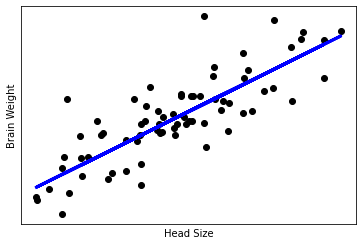

In [10]:
from google.colab import files
import numpy as np
#from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
#from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

uploadedfile = None
def uploadLocalFile():
  global uploadedfile
  uploaded = files.upload()
  #print('uploaded',uploaded)
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    #print('File**',uploaded[fn])
  return next(iter(uploaded)) 
 
def MeanData(arr):
    size = len(arr)
    sumarr= 0    
    for  i in range(size):
        sumarr = sumarr + arr[i]        
    return(sumarr/size)
 
def HeadBrain(Name):
    dataset = pd.read_csv(Name)
    print("Size of our Data set is ",dataset.shape)
    
    X= dataset["Head Size(cm^3)"].values
    Y= dataset["Brain Weight(grams)"].values
    X = X.reshape((-1,1))
    print("Length of X ",len(X))
    print("Length of Y ",len(Y))

    data_train,data_test,target_train,target_test = train_test_split(X,Y,test_size=0.3)
    
    obj = LinearRegression()
    obj.fit(data_train,target_train)
    
    output = obj.predict(data_test)
  
  
    print('Coefficients: \n', obj.coef_)
    print('Mean squared error: %.2f'% mean_squared_error(target_test, output))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'%r2_score(target_test, output))

    data_test = data_test.reshape((-1,1))
    
    rsquare = obj.score(data_test,output)
    rsquare2 = obj.score(X,Y)
    print("Value of R Square is : ",rsquare)
    print("Value of R rsquare2 is : ",rsquare2)
    
    # Plot outputs
    plt.scatter(data_test, target_test,  color='black')
    plt.plot(data_test, output, color='blue', linewidth=3)
    plt.xlabel("Head Size")
    plt.ylabel("Brain Weight")
    plt.xticks(())
    plt.yticks(())

    plt.show()
 
def main():
    #print("Enter File Name of dataSet : ")
    #name = input()
    filename = uploadLocalFile()
    HeadBrain(filename)   #HeadBrain("MarvellousHeadBrain.csv")
 
 
 
if __name__ == "__main__":
    main()